<a href="https://colab.research.google.com/github/2303A54060/Elevate-task-1/blob/main/elevate_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

# Create database and sales table
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ("Laptop", 5, 60000),
    ("Mouse", 15, 500),
    ("Keyboard", 10, 1000),
    ("Monitor", 7, 12000),
    ("Laptop", 3, 60000),
    ("Mouse", 10, 500),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


Sales Summary:
     product  total_qty   revenue
0  Keyboard         10   10000.0
1    Laptop          8  480000.0
2   Monitor          7   84000.0
3     Mouse         25   12500.0


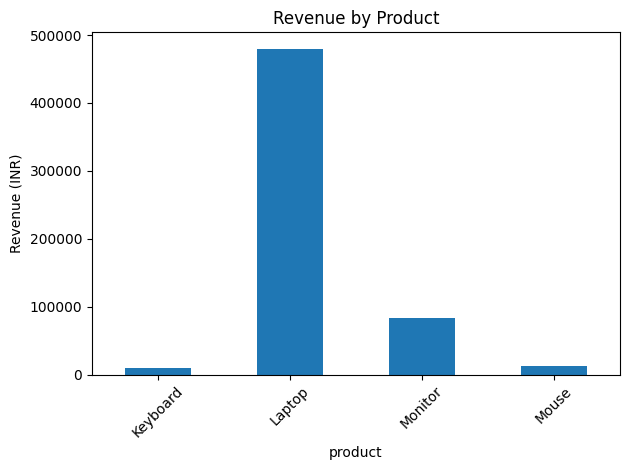

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load data into pandas
df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)

# Plot chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()


In [ ]:
from google.colab import files
files.download("sales_data.db")
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>